<a href="https://colab.research.google.com/github/wagnermoraesjr/Analise_de_Vendas_Farmaceuticas/blob/main/Projeto_Analise_de_Vendas_Farmaceuticas_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto: Análise de Vendas Farmacêuticas**

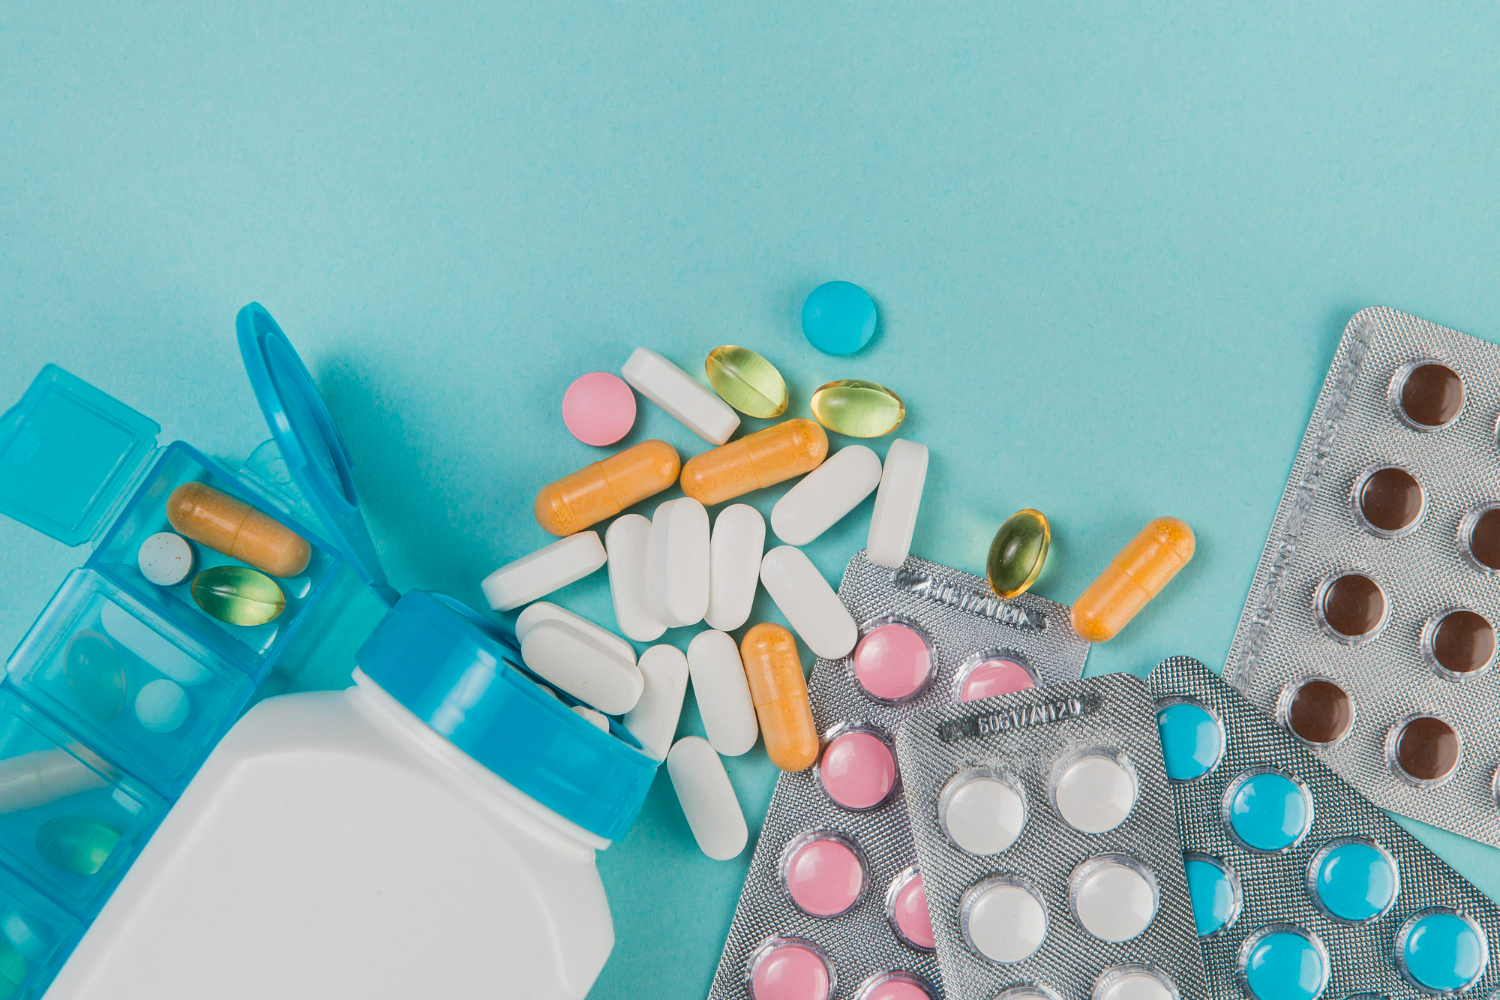

## **1. Objetivo**

Compreender as tendências, padrões e características das vendas farmacêuticas em diferentes regiões e demografias, atráves da Análise Exploratória de Dados (EDA).

Essa análise dos dados deverá permitir conhecermos as tendências de vendas, os produtos mais vendidos, a demografia dos consumidores e se existe alguma correlação entre as variáveis. Serão plotados alguns gráficos para que possamos ter uma visualização melhor dos dados.

Com base nessa análise dos dados iremos identificar insights sobre os hábitos de compra e padrões dos consumidores.

<br>

## **2. Introdução**

O Dataset utilizado para essa análise será o **[Medicamentos Industrializados - Novembro de 2021](https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados)** disponibilizado pela Agência Nacional de Vigilância Sanitária - ANVISA no portal de dados do Governo Federal.
<br><br>
**Sobre o conjunto de dados:**

Dados Abertos de Venda de Medicamentos Industrializados do Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC) de Novembro de 2021.
<br><br>
O Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC), monitora as
movimentações de entrada (compras e transferências) e saída (vendas,transformações, transferências e perdas) de medicamentos sujeitos à escrituração no SNGPC comercializados em farmácias e drogarias privadas do país.
<br><br>
**Observação:** De acordo com a RDC 586/2021, os prazos para a transmissão dos dados de venda de medicamentos sujeitos ao controle especial foram temporariamente suspensos. Embora os estabelecimentos precisem manter seus registros internos, a partir de 5 de outubro de 2021, a transmissão de dados deixou de ser obrigatória. Adicionalmente, para implementar solução tecnológica no sistema, a partir de 23 de dezembro de 2022 o acesso ao sistema foi interrompido de forma geral. Com isso, a transmissão de arquivos com dados de movimentações de medicamentos e insumos sujeitos ao controle especial ficou opcional, entre 05/10/2021 e 22/12/2022, e passou a ser suspensa, a partir de 23/12/2022.
<br><br>
**Dicionário dos Dados:**

**`ANO_VENDA:`** Ano da venda do medicamento.<br>
**`MES_VENDA:`** Mês da venda do medicamento.<br>
**`UF_VENDA:`** Unidade Federativa do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando a UF onde ocorreu a venda.<br>
**`MUNICIPIO_VENDA:`** Município do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando o Município onde ocorreu a venda.<br>
**`PRINCIPIO_ATIVO:`** Nome do princípio ativo do medicamento industrializado, conforme cadastrado no registro do medicamento, no banco de dados da Anvisa. Quando um medicamento tem mais de um princípio ativo, cada um deles é separado pelo caractere “+”. Ex.: “PRINCÍPIO ATIVO 1 + PRINCÍPIO ATIVO 2”.<br>
**`DESCRICAO_APRESENTACAO:`** Uma apresentação de medicamento representa o modo como um medicamento é apresentado na embalagem. Exemplo: Medicamento X, pode ter duas apresentações diferentes:

*   **Apresentação 1:** Uma caixa com 1 blister de alumínio com 20 comprimidos, cada comprimido com 5 mg de princípio ativo. Nesse caso, a descrição da apresentação seria: “5 MG COM CT BL AL X 20”.
*   **Apresentação 2:** Uma caixa com 1 frasco de vidro com 50 mL de um xarope, com concentração do princípio ativo de 15 mg por mL. Nesse caso, a descrição da apresentação seria: 15MG/ML XPE CT FR VD x 50 ML.

**`QTD_VENDIDA:`** Quantidade vendida de caixas ou frascos do medicamento.<br>
**`UNIDADE_MEDIDA:`** Indica se a quantidade vendida do medicamento foi de caixas ou frascos.<br>
**`CONSELHO_PRESCRITOR:`** Conselho de Classe do profissional que prescreveu o medicamento vendido.<br>
**`UF_CONSELHO_PRESCRITOR:`** Unidade Federativa do Conselho de Classe do profissional que prescreveu o medicamento vendido.<br>
**`TIPO_RECEITUARIO:`** Tipo de receituário utilizado na prescrição. Valores e respectivos tipos de receituário:<br>

1. Receita de Controle Especial em 2 vias (Receita Branca);
2. Notificação de Receita B (Notificação Azul);
3. Notificação de Receita Especial (Notificação Branca);
4. Notificação de Receita A (Notificação Amarela);
5. Receita Antimicrobiano em 2 vias.

**`CID10:`** Classificação Internacional de Doença (aplicável apenas a medicamentos antimicrobianos).<br>
**`SEXO:`** Sexo do paciente (aplicável apenas a medicamentos antimicrobianos). Valor 1 para o sexo masculino, valor 2 para o sexo feminino.<br>
**`IDADE:`** Valor numérico que representa a idade do paciente, em meses ou anos (aplicável apenas a medicamentos antimicrobianos).<br>
**`UNIDADE_IDADE:`** Unidade de medida da idade do paciente, que pode ser em meses ou anos (aplicável apenas a medicamentos antimicrobianos). Valor 1 para unidade de medida em anos, valor 2 para unidade de medida em meses.
<br><br>
**Observação:** Os campos não preenchidos eventualmente encontrados nos arquivos são decorrentes do não preenchimento do referido campo pela farmácia ou drogaria, ou devido ao fato de o campo não se aplicar a determinada categoria. Por exemplo, o campo CID10 é aplicável às vendas de medicamentos antimicrobianos. Ainda assim, mesmo para vendas de medicamentos antimicrobianos, o valor para esse campo pode não ter sido informado.

<br>

## **3. Bibliotecas necessárias**

Nesse projeto vou trabalhar com as seguintes bibliotecas:
- **Pandas:** Para ajudar na manipulação da base da dados.
- **Matplotlib e Seaborn:** Para plotagem de gráficos que irão nos auxiliar na análise.
- **Numpy:** Ela torna mais fácil fazer cálculos matemáticos e manipular grandes conjuntos de dados.

In [ ]:
# Importando bibliotecas Pandas e Matplotlib.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<br>

## **4. Importação, Limpeza e Pré-processamento dos Dados**

### **4.1 Importação e informações do Dataset**

In [ ]:
# Lendo o nosso dataset.
df_medicines = pd.read_csv('EDA_Industrializados_202111.csv' ,
                  delimiter=';',
                  encoding='ISO-8859-1'
                  )
df_medicines.shape

(2785568, 15)

In [ ]:
# Mostrando as primeiras e últimas linhas do dataframe.
display(df_medicines.head())
display(df_medicines.tail())

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
0,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,37.0,1.0
1,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,40.0,1.0
2,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5.0,NaN,1.0,45.0,1.0
3,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5.0,NaN,2.0,34.0,1.0
4,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,2.0,36.0,1.0


,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
2785563,2021,11,RJ,NOVA FRIBURGO,FOSFOMICINA TROMETAMOL,"5,631G GRAN CT ENV AL PE X 8G",1,FRASCO,CRM,RJ,5.0,NaN,2.0,85.0,1.0
2785564,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL AL X 30,2,CAIXA,CRO,RJ,1.0,NaN,NaN,NaN,NaN
2785565,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL PLAS OPC X 30,1,CAIXA,CRM,RJ,1.0,NaN,1.0,45.0,1.0
2785566,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL PLAS OPC X 30,1,CAIXA,CRM,RJ,1.0,NaN,1.0,65.0,1.0
2785567,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL PLAS OPC X 30,2,CAIXA,CRM,RJ,1.0,NaN,2.0,30.0,1.0


In [ ]:
# Checando as informações gerais do dataframe.
df_medicines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785568 entries, 0 to 2785567
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ANO_VENDA               int64  
 1   MES_VENDA               int64  
 2   UF_VENDA                object 
 3   MUNICIPIO_VENDA         object 
 4   PRINCIPIO_ATIVO         object 
 5   DESCRICAO_APRESENTACAO  object 
 6   QTD_VENDIDA             int64  
 7   UNIDADE_MEDIDA          object 
 8   CONSELHO_PRESCRITOR     object 
 9   UF_CONSELHO_PRESCRITOR  object 
 10  TIPO_RECEITUARIO        float64
 11  CID10                   object 
 12  SEXO                    float64
 13  IDADE                   float64
 14  UNIDADE_IDADE           float64
dtypes: float64(4), int64(3), object(8)
memory usage: 318.8+ MB


In [ ]:
"""
Gerando um dataframe contendo metadados das colunas do dataframe fornecido.
:param dataframe: DataFrame para o qual os metadados serão gerados.
:return: DataFrame contendo metadados.
"""

def generate_metadata(dataframe):

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
# Testando a função com o dataframe df_medicines.
metadata_df = generate_metadata(df_medicines)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,ANO_VENDA,int64,0,0.00,1
1,MES_VENDA,int64,0,0.00,1
2,QTD_VENDIDA,int64,0,0.00,914
3,TIPO_RECEITUARIO,float64,0,0.00,5
4,SEXO,float64,995525,35.74,2
5,IDADE,float64,995525,35.74,729
6,UNIDADE_IDADE,float64,995525,35.74,2
7,UF_VENDA,object,0,0.00,27
8,MUNICIPIO_VENDA,object,0,0.00,4625
9,PRINCIPIO_ATIVO,object,4827,0.17,661


### **4.2 Limpeza e Transformação do DataFrame**

Conforme descrito nas informações sobre o conjunto de dados, as variáveis **`SEXO`**, **`IDADE`**, **`UNIDADE_IDADE`** e **`CID10`** somente são aplicáveis no caso de medicamentos antimicrobianos, **sendo assim não irei fazer o tratamento dos valores nulos referêntes à essas variáveis neste momento** (exceto para a variável **`CID10`**), mais adiante, quando formos estudar os dados demográficos faremos um tratamento específico, para análise com **foco nos medicamentos antimicrobianos**.
<br><br>
Neste momento, optei por excluir a variável **`CID10`** do DataFrame, pois os valores nulos representam 99,59% do total de dados, o que torna essa coluna irrelevante para o nosso estudo.

In [ ]:
# Excluindo a variável "CID10".
df_medicines_limpo = df_medicines.drop(columns='CID10')

df_medicines_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785568 entries, 0 to 2785567
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ANO_VENDA               int64  
 1   MES_VENDA               int64  
 2   UF_VENDA                object 
 3   MUNICIPIO_VENDA         object 
 4   PRINCIPIO_ATIVO         object 
 5   DESCRICAO_APRESENTACAO  object 
 6   QTD_VENDIDA             int64  
 7   UNIDADE_MEDIDA          object 
 8   CONSELHO_PRESCRITOR     object 
 9   UF_CONSELHO_PRESCRITOR  object 
 10  TIPO_RECEITUARIO        float64
 11  SEXO                    float64
 12  IDADE                   float64
 13  UNIDADE_IDADE           float64
dtypes: float64(4), int64(3), object(7)
memory usage: 297.5+ MB


Quero verificar a existência de valores extremos (outliers) nos dados referentes às colunas **`QTD_VENDIDA`** e **`IDADE`**, para isso, será necessário primeiramente criar uma coluna com a idade padronizada em anos, pois como vimos no dicionário de dados, a coluna **`IDADE`** não distingue se o valor representa os anos ou meses dos clientes, somente na coluna **`UNIDADE_IDADE`** temos essa informação. Também irei manter somente os registros que contenham **`QTD_VENDIDA`** menor que **5.000 unidades**.

In [ ]:
# Criando uma coluna chamada "IDADE_ANOS" e transformando a idade que estava em meses para anos.
df_medicines_limpo['IDADE_ANOS'] = df_medicines_limpo.apply(lambda row: row['IDADE'] / 12 if row['UNIDADE_IDADE'] == 2.0 else row['IDADE'], axis=1)

df_medicines_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785568 entries, 0 to 2785567
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ANO_VENDA               int64  
 1   MES_VENDA               int64  
 2   UF_VENDA                object 
 3   MUNICIPIO_VENDA         object 
 4   PRINCIPIO_ATIVO         object 
 5   DESCRICAO_APRESENTACAO  object 
 6   QTD_VENDIDA             int64  
 7   UNIDADE_MEDIDA          object 
 8   CONSELHO_PRESCRITOR     object 
 9   UF_CONSELHO_PRESCRITOR  object 
 10  TIPO_RECEITUARIO        float64
 11  SEXO                    float64
 12  IDADE                   float64
 13  UNIDADE_IDADE           float64
 14  IDADE_ANOS              float64
dtypes: float64(5), int64(3), object(7)
memory usage: 318.8+ MB


In [ ]:
# Salvando no dataframe somente os registros com "QTD_VENDIDA" menores que 10000.
df_medicines_limpo = df_medicines_limpo[df_medicines_limpo['QTD_VENDIDA'] <= 5000]

In [ ]:
# Excluindo os registros com dados nulos da coluna "QTD_VENDIDA" para visualizarmos o boxplot dessa variável.
df_medicines_drop_qtd = df_medicines_limpo['QTD_VENDIDA'].dropna()

print('Nulos em QTD_VENDIDA:', df_medicines_drop_qtd.isna().sum())

Nulos em QTD_VENDIDA: 0


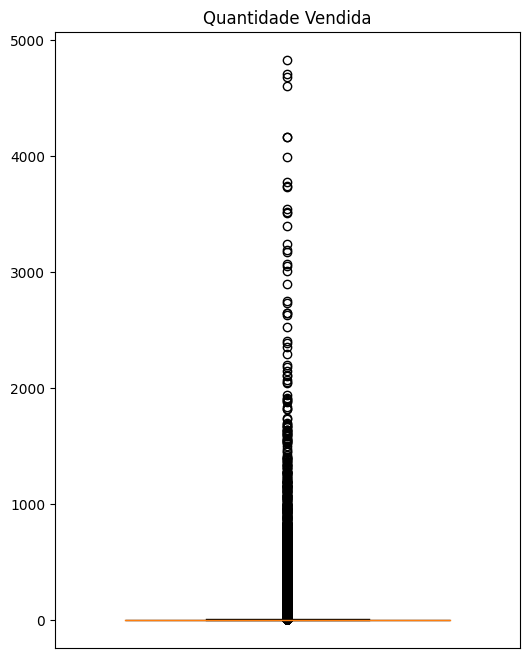

In [ ]:
# Checando se há outliers na variável "QTD_VENDIDA" através da análise do boxplot.
fig, ax = plt.subplots(figsize=(6, 8))
ax.boxplot(df_medicines_drop_qtd, widths=0.7, patch_artist=True, boxprops=dict(facecolor="lightblue"))
ax.set_title('Quantidade Vendida')
ax.axes.get_xaxis().set_visible(False)

plt.show()

In [ ]:
# Excluindo os registros com dados nulos da coluna "IDADE_ANOS" para visualizarmos o boxplot dessa variável.
df_medicines_drop_idade = df_medicines_limpo['IDADE_ANOS'].dropna()

print('Nulos em IDADE_ANOS:', df_medicines_drop_idade.isna().sum())

Nulos em IDADE_ANOS: 0


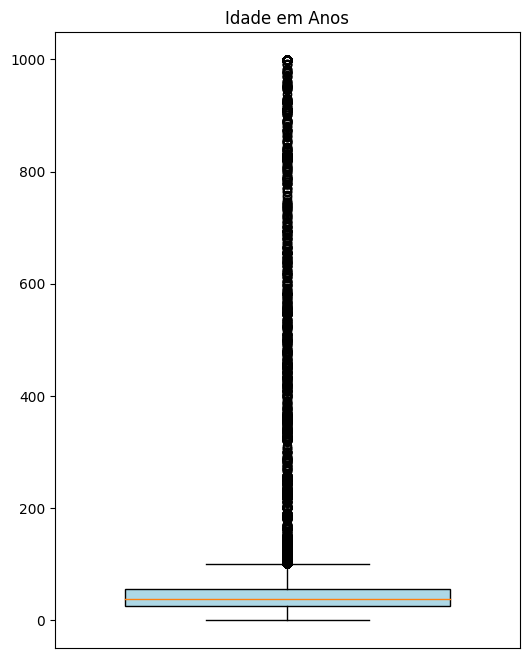

In [ ]:
# Checando se há outliers na variável "IDADE_ANOS" através da análise do boxplot.
fig, ax = plt.subplots(figsize=(6, 8))
ax.boxplot(df_medicines_drop_idade, widths=0.7, patch_artist=True, boxprops=dict(facecolor="lightblue"))
ax.set_title('Idade em Anos')
ax.axes.get_xaxis().set_visible(False)

plt.show()

Os boxplots acima mostram que existem bastante outliers no DataFrame, porém no caso da variável **`IDADE_ANOS`** é possível afirmar que exitem dados incorretos, **pois há registros com idades acima de 120 anos**, o que é bem incomum no Brasil. Nesse caso optei por manter os dados no DataFrame e farei um filtro no momento de plotar os gráficos mais adiante, para termos uma análise mais correta e real sobre as idades.

Como na variável **`PRINCIPIO_ATIVO`** existe menos de 1% de valores nulos, irei apenas alterar os valores nulos por "Não Informado", para não influenciar na análise dos medicamentos mais vendidos por princípio ativo.

In [ ]:
# Substituindo os valores nulos da variável "PRINCIPIO_ATIVO" por "Não Informado".
df_medicines_limpo['PRINCIPIO_ATIVO'] = df_medicines_limpo['PRINCIPIO_ATIVO'].fillna('Não Informado')

In [ ]:
# Checando se ficou algum valor nulo ainda.
checar_nulos_principio = df_medicines_limpo['PRINCIPIO_ATIVO'].isnull().sum()
print('Número de valores nulos na variável "PRINCIPIO_ATIVO":', checar_nulos_principio)

Número de valores nulos na variável "PRINCIPIO_ATIVO": 0


In [ ]:
# Verificando como ficou a quantidade de linhas e colunas após a limpeza e transformação dos dados.
print('Antes da limpeza e transformação:', df_medicines.shape)
print('Depois da limpeza e transformação:', df_medicines_limpo.shape)

Antes da limpeza e transformação: (2785568, 15)
Depois da limpeza e transformação: (2785558, 15)


**Resultado:**<br>
1 coluna foi excluída (**`CID10`**) e 1 coluna foi acrescentada (**`IDADE_ANOS`**).<br>
10 linhas foram desconsideradas do DataFrame, pois estavam com valores superiores a 5.000 na coluna **`QTD_VENDIDA`**.

<br>

## **5. EDA - Exploratory Data Analysis (Análise Exploratória de Dados)**

In [ ]:
df_medicines_limpo

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE,IDADE_ANOS
0,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,1.0,37.0,1.0,37.0
1,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,1.0,40.0,1.0,40.0
2,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5.0,1.0,45.0,1.0,45.0
3,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5.0,2.0,34.0,1.0,34.0
4,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,2.0,36.0,1.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785563,2021,11,RJ,NOVA FRIBURGO,FOSFOMICINA TROMETAMOL,"5,631G GRAN CT ENV AL PE X 8G",1,FRASCO,CRM,RJ,5.0,2.0,85.0,1.0,85.0
2785564,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL AL X 30,2,CAIXA,CRO,RJ,1.0,NaN,NaN,NaN,NaN
2785565,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL PLAS OPC X 30,1,CAIXA,CRM,RJ,1.0,1.0,45.0,1.0,45.0
2785566,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL PLAS OPC X 30,1,CAIXA,CRM,RJ,1.0,1.0,65.0,1.0,65.0


In [ ]:
df_medicines_limpo.describe(include='all')

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE,IDADE_ANOS
count,2785558.0,2785558.0,2785558,2785558,2785558,2785558,2.785558e+06,2785558,2785558,2785558,2.785558e+06,1.790041e+06,1.790041e+06,1.790041e+06,1.790041e+06
unique,NaN,NaN,27,4625,662,3681,NaN,2,4,27,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,SP,SÃO PAULO,AZITROMICINA DI-HIDRATADA,500 MG CAP DURA CT BL AL PLAS TRANS X 21,NaN,CAIXA,CRM,SP,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,585806,64828,177172,88157,NaN,2321673,2519354,590759,NaN,NaN,NaN,NaN,NaN
mean,2021.0,11.0,NaN,NaN,NaN,NaN,3.529357e+00,NaN,NaN,NaN,3.397360e+00,1.552498e+00,4.080763e+01,1.015238e+00,4.052170e+01
std,0.0,0.0,NaN,NaN,NaN,NaN,2.028077e+01,NaN,NaN,NaN,1.865047e+00,4.972365e-01,4.218357e+01,1.224990e-01,4.156428e+01
min,2021.0,11.0,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2021.0,11.0,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,1.000000e+00,1.000000e+00,2.500000e+01,1.000000e+00,2.500000e+01
50%,2021.0,11.0,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,5.000000e+00,2.000000e+00,3.900000e+01,1.000000e+00,3.800000e+01
75%,2021.0,11.0,NaN,NaN,NaN,NaN,3.000000e+00,NaN,NaN,NaN,5.000000e+00,2.000000e+00,5.500000e+01,1.000000e+00,5.500000e+01


### **5.1 Tendências de Vendas**

#### **5.1.1 Vendas mensais: Identificar se há meses com vendas excepcionalmente altas ou baixas.**

In [ ]:
# Exibir a quantidade de registros, ou seja, quantidade de vendas.
print('Quantidade de vendas em Novembro/2021:', len(df_medicines_limpo))

Quantidade de vendas em Novembro/2021: 2785558


Como estou trabalhando apenas com o Dataset referente a Novembro de 2021, só haverão registros de Novembro de 2021. **Para o mês estudado o total de vendas foi de 2.785.558**. Para os próximos estudos podemos apendar outros Datasets referentes aos meses anteriores, para um estudo mais amplo.

#### **5.1.2 Análise por estado (UF_VENDA): Quais estados têm o maior número de vendas? Existem padrões regionais?**

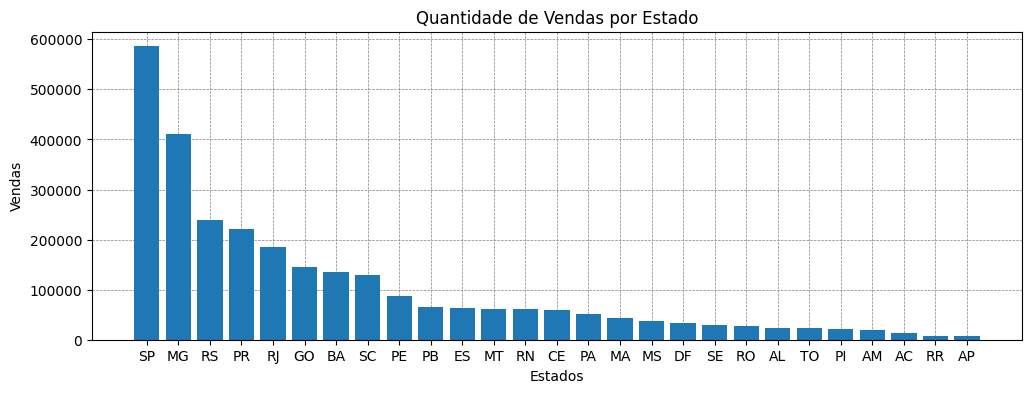

In [ ]:
# Contando quantas vendas foram feitas em cada estado.
vendas_uf = dict(df_medicines_limpo['UF_VENDA'].value_counts())

# Plotando o gráfico de barras com a quantidade de vendas por estado.
fig, ax = plt.subplots(figsize=(12,4))
plt.bar(vendas_uf.keys(), vendas_uf.values())

plt.title('Quantidade de Vendas por Estado')
plt.xlabel('Estados')
plt.ylabel('Vendas')

ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_axisbelow(True)

plt.show()

O estado que registrou o maior número de vendas foi **São Paulo** com quase **600.000** vendas no mês de novembro. Seguido por **Minas Gerais** (pouco mais de 400.000 vendas), **Rio Grande do Sul** (pouco mais de 200.000 vendas), **Paraná** (pouco mais de 200.000 vendas) e **Rio de Janeiro** (com quase 200.000 vendas).
<br><br>
Vemos São Paulo com um grande número de vendas, quase o triplo dos estados que ficaram da 3ª à 5ª posição, e Minas Gerais com aproximadamente o dobro de vendas para esses estados.
<br><br>
Existe um padrão regional, observamos que as vendas são maiores nos estados do **Sudeste** e do **Sul** do país, respectivamente.

### **5.2 Produtos Mais Vendidos**

#### **5.2.1 Baseado no PRINCIPIO_ATIVO: Quais são os medicamentos mais populares?**

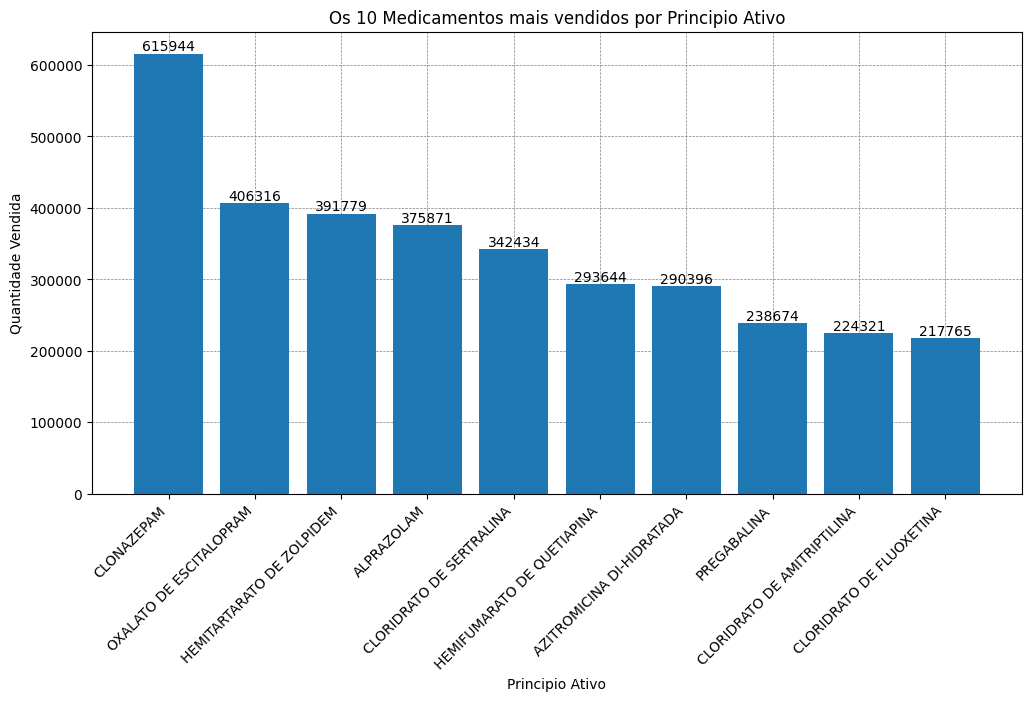

In [ ]:
# Contando quantas vendas foram feitas por principio ativo.
qtd_principio = df_medicines_limpo.groupby('PRINCIPIO_ATIVO')['QTD_VENDIDA'].sum()

# Selecionando o top 10 mais vendidos.
top_10_principio = qtd_principio.sort_values(ascending=False).head(10)

# Plotando o gráfico de barras com o top 10 de vendas por principio ativo.
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(top_10_principio.index, top_10_principio.values)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(top_10_principio.values):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom')

ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_axisbelow(True)

plt.title('Os 10 Medicamentos mais vendidos por Principio Ativo')
plt.xlabel('Principio Ativo')
plt.ylabel('Quantidade Vendida')

plt.show()

#### **5.2.2 Baseado na DESCRICAO_APRESENTACAO: Quais apresentações ou dosagens são mais vendidas?**

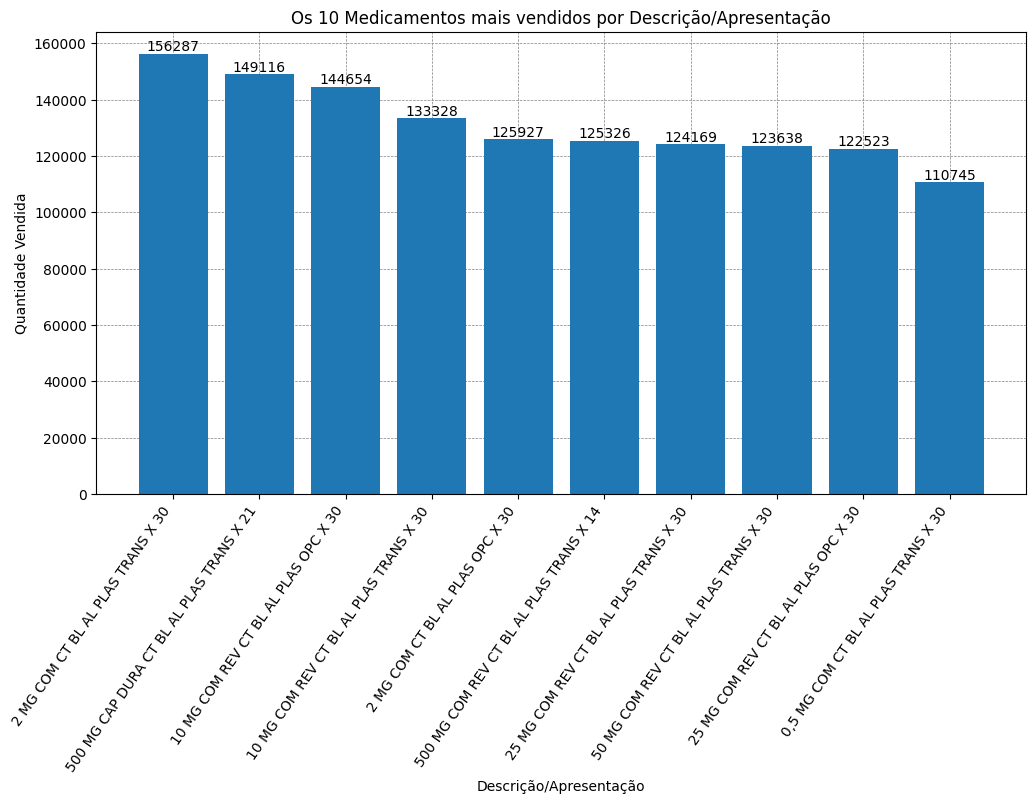

In [ ]:
# Contando quantas vendas foram feitas por descrição/apresentação.
qtd_descricao = df_medicines_limpo.groupby('DESCRICAO_APRESENTACAO')['QTD_VENDIDA'].sum()

# Selecionando o top 10 mais vendidos.
top_10_descricao = qtd_descricao.sort_values(ascending=False).head(10)

# Plotando o gráfico de barras com o top 10 de vendas por principio ativo.
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(top_10_descricao.index, top_10_descricao.values)
plt.xticks(rotation=55, ha='right')

for i, v in enumerate(top_10_descricao.values):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom')

ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_axisbelow(True)

plt.title('Os 10 Medicamentos mais vendidos por Descrição/Apresentação')
plt.xlabel('Descrição/Apresentação')
plt.ylabel('Quantidade Vendida')

plt.show()

Analisando os dois gráficos anteriores podemos afirmar que os medicamentos mais vendidos baseados no Princípio Ativo e na Descrição/Apresentação foram:
<br><br>
**Princípio Ativo:**
1. CLONAZEPAM
2. OXALATO DE ESCITALOPRAM
3. HEMITARTARATO DE ZOLPIDEM
4. ALPRAZOLAM
5. CLORIDRATO DE SERTRALINA

**Descrição/Apresentação:**
1. 2 MG COM CT BL AL PLAS TRANS X 30
2. 500 MG CAP DURA CT BL AL PLAS TRANS X 21
3. 10 MG COM REV CT BL AL PLAS OPC X 30
4. 10 MG COM REV CT BL AL PLAS TRANS X 30
5. 2 MG COM CT BL AL PLAS OPC X 30

**Observação:** Vale ressaltar que a quantidade estudada foi de produtos vendidos e não a quantidade de vendas únicas feitas. Importante lembrar também que alguns medicamentos possuem mais de um princípio ativo juntos e nesse caso foram contabilizados como um medicamento distinto dos medicamentos que levam apenas um princípio ativo em sua fórmula. Ex.: “PRINCÍPIO ATIVO 1” sozinho é diferente de “PRINCÍPIO ATIVO 1 + PRINCÍPIO ATIVO 2”.

### **5.3 Demografia dos Consumidores**

#### **5.3.1 Distribuição de idade dos consumidores**

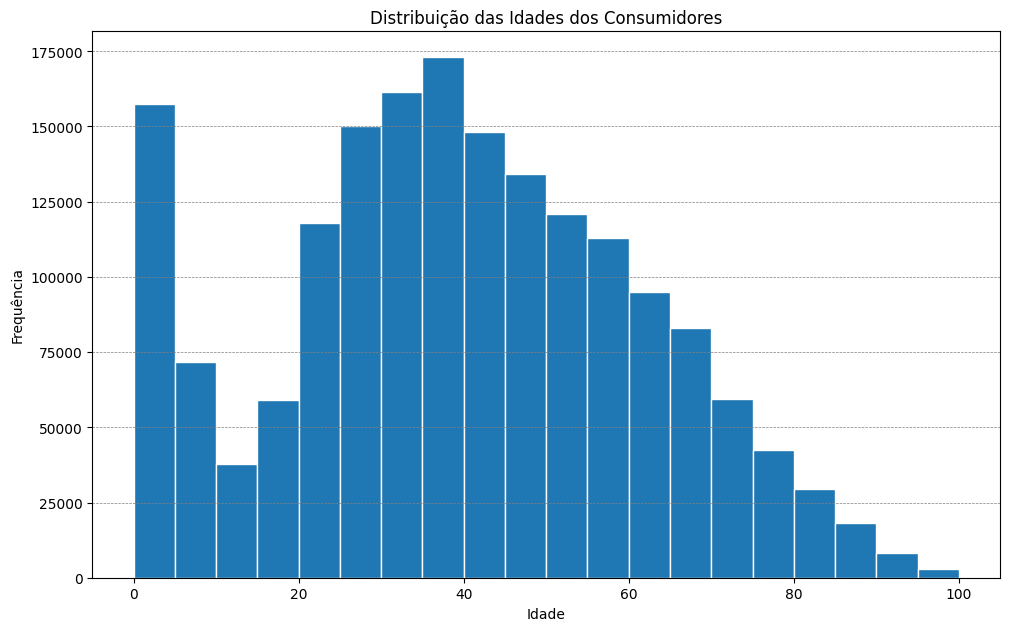

In [ ]:
# Filtrando a idade dos compradores para até 100 anos.
idade_anos_filtrado = df_medicines_limpo[(df_medicines_limpo['IDADE_ANOS'] >= 0.0) & (df_medicines_limpo['IDADE_ANOS'] <= 100.0)]['IDADE_ANOS']

# Plotando o gráfico de barras de idade.
plt.figure(figsize=(10, 6))
plt.hist(idade_anos_filtrado, bins=20, edgecolor='white', alpha=1)

plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()

plt.title('Distribuição das Idades dos Consumidores')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.show()

#### **5.3.2 Distribuição de gênero dos consumidores**

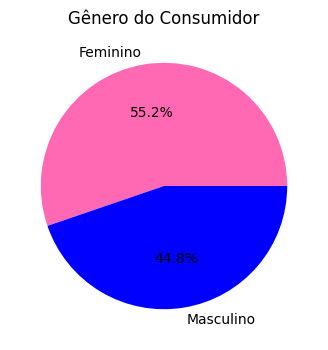

In [ ]:
# Plotando um gráfico de pizza para o gênero dos compradores.
rotulos_personalizados = ['Masculino' if valor == 1 else 'Feminino' for valor in df_medicines_limpo['SEXO'] if valor in [1.0, 2.0]]

labels = pd.Series(rotulos_personalizados).value_counts().index
sizes = pd.Series(rotulos_personalizados).value_counts()
cores_personalizadas = ['#FF69B4', '#0000FF']

plt.figure(figsize = (4,4))
plt.pie(sizes, labels=labels, colors=cores_personalizadas, rotatelabels=False, autopct='%1.1f%%')

plt.title('Gênero do Consumidor',color = 'black',fontsize = 12)

plt.show()

Para essa análise, optei por restringir a idade dos consumidores até 100 anos, pois haviam vários registros acima dessa idade, o que é bem incomum no Brasil.
<br><br>
Quando analisamos o perfil dos consumidores, é possível notar que são na maioria **mulheres e com idade entre 30 a 40 anos**, indo contra o senso comum de que crianças e idosos ficam mais doentes e necessitam portanto de mais remédios. Porém um fator que pode explicar esses dados, e precisamos levar em consideração, é de que tanto a idade quanto o sexo do consumidor só é informado para os casos de medicamentos antimicrobianos e não para os demais medicamentos. Sendo assim, nessa análise estamos considerando somente os medicamentos antimicrobianos.
<br><br>
Vale lembrar também que estamos falando de consumidores (paciêntes) e não dos compradores, pois uma pessoa pode comprar (comprador) o medicamento para outra pessoa consumir (consumidor).

### **5.4 Relações**

Aproveitando os dados sobre a demografia dos consumidores, analisaremos se existe relação entre as variáveis de **`IDADE_ANOS`** e **`SEXO`** e a variável **`PRINCIPIO_ATIVO`**.

#### **5.4.1 Limpeza e Transformação dos Dados**
Nesse momento em que iremos analisar a relação das variáveis **`IDADE_ANOS`**, **`SEXO`** e **`PRINCIPIO_ATIVO`**, para que possamos ter um melhor resultado e sabendo que somente os medicamentos antimicrobianos possuem registro de idade e sexo, vamos trabalhar com um DataFrame onde será feita a **exclusão dos registros com valores nulos nas variáveis** **`IDADE_ANOS`** e **`SEXO`** e vamos **imputar a moda nos valores nulos da coluna** **`PRINCIPIO_ATIVO`**. Além disso vamos **excluir também os registros da variável** **`IDADE_ANOS`** **cujo o valor é maior que 100 anos**.

In [ ]:
# Excluindo os registros com valores nulos da coluna "IDADE_ANOS" e "SEXO".
df_medicines_relacao = df_medicines_limpo.dropna(subset=['IDADE_ANOS', 'SEXO'])

nulos_idade = df_medicines_relacao['IDADE_ANOS'].isna().sum()
nulos_sexo = df_medicines_relacao['SEXO'].isna().sum()

print(f"Quantidade de valores nulos na coluna IDADE_ANOS: {nulos_idade}")
print(f"Quantidade de valores nulos na coluna SEXO: {nulos_sexo}")

Quantidade de valores nulos na coluna IDADE_ANOS: 0
Quantidade de valores nulos na coluna SEXO: 0


In [ ]:
# Excluindo os registros com valores maiores que 100, na coluna "IDADE_ANOS".
df_medicines_relacao = df_medicines_relacao.loc[df_medicines_relacao['IDADE_ANOS'] <= 100]

valor_maximo = df_medicines_relacao['IDADE_ANOS'].max()
valor_minimo = df_medicines_relacao['IDADE_ANOS'].min()

print(f"Maior valor encontrado: {valor_maximo}")
print(f"Menor valor encontrado: {valor_minimo}")

Maior valor encontrado: 100.0
Menor valor encontrado: 0.0


In [ ]:
# Substituindo os valores nulos da coluna "PRINCIPIO_ATIVO" pela moda.
moda_principio = df_medicines_limpo['PRINCIPIO_ATIVO'].mode().iloc[0]

df_medicines_relacao['PRINCIPIO_ATIVO'].fillna(df_medicines_relacao['PRINCIPIO_ATIVO'].mode(), inplace=True)
nulos_principio = df_medicines_relacao['PRINCIPIO_ATIVO'].isna().sum()

print("O Princípio Ativo que mais aparece no conjunto de dados é:", moda_principio)
print("\nImportante: É o Princípio Ativo que tem mais registros e não o mais vendido, pois cada venda tem uma quantidade determinada de produtos vendidos.")
print(f"\nQuantidade de valores nulos na coluna PRINCIPIO_ATIVO: {nulos_principio}")

O Princípio Ativo que mais aparece no conjunto de dados é: AZITROMICINA DI-HIDRATADA

Importante: É o Princípio Ativo que tem mais registros e não o mais vendido, pois cada venda tem uma quantidade determinada de produtos vendidos.

Quantidade de valores nulos na coluna PRINCIPIO_ATIVO: 0


In [ ]:
# Verificando se ficou algum valor nulo no DataFrame.
df_medicines_relacao.isnull().sum()

ANO_VENDA                 0
MES_VENDA                 0
UF_VENDA                  0
MUNICIPIO_VENDA           0
PRINCIPIO_ATIVO           0
DESCRICAO_APRESENTACAO    0
QTD_VENDIDA               0
UNIDADE_MEDIDA            0
CONSELHO_PRESCRITOR       0
UF_CONSELHO_PRESCRITOR    0
TIPO_RECEITUARIO          0
SEXO                      0
IDADE                     0
UNIDADE_IDADE             0
IDADE_ANOS                0
dtype: int64

#### **5.4.2 Existe uma relação entre o tipo de medicamento e a idade do consumidor?**

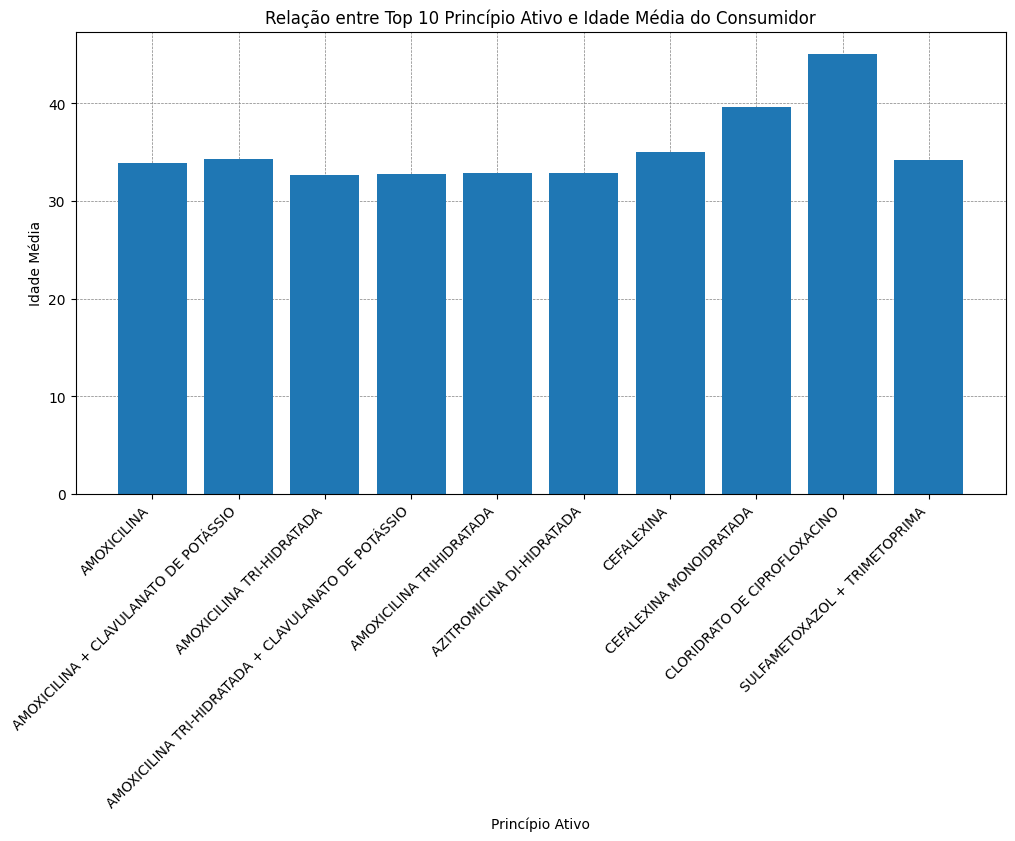

In [ ]:
# Contando quantas vendas foram feitas por principio ativo.
contagem_principio_relacao = df_medicines_relacao['PRINCIPIO_ATIVO'].value_counts().head(10).index.tolist()

# Filtrar o DataFrame para incluir apenas as 10 principais categorias de "PRINCIPIO_ATIVO".
df_top_10_principio_ativo = df_medicines_relacao[df_medicines_relacao['PRINCIPIO_ATIVO'].isin(contagem_principio_relacao)]

# Calculando a média das idades para essas 10 categorias.
principio_media_idade = df_top_10_principio_ativo.groupby('PRINCIPIO_ATIVO')['IDADE_ANOS'].mean()

# Plotando um gráfico de barras com a relação entre as variáveis.
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(principio_media_idade.index, principio_media_idade.values)
plt.xticks(rotation=45, ha='right')

ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_axisbelow(True)

plt.xlabel("Princípio Ativo")
plt.ylabel("Idade Média")
plt.title("Relação entre Top 10 Princípio Ativo e Idade Média do Consumidor")

plt.show()

#### **5.4.3 Existe uma relação entre o tipo de medicamento e o gênero do consumidor?**

In [ ]:
# Criar uma tabela de contingência entre "PRINCIPIO_ATIVO" e "SEXO".
tabela_contingencia_sexo = pd.crosstab(df_top_10_principio_ativo['PRINCIPIO_ATIVO'], df_top_10_principio_ativo['SEXO'])

# Função para calcular a porcentagem.
def calculate_percentage(row):
    total = row[1.0] + row[2.0]
    row['Masculino (%)'] = round((row[1.0] / total) * 100, 2)
    row['Feminino (%)'] = round((row[2.0] / total) * 100, 2)
    return row

# Aplicando a função para calcular a porcentagem a cada linha da tabela de contingência.
tabela_contingencia_sexo = tabela_contingencia_sexo.apply(calculate_percentage, axis=1)

tabela_contingencia_sexo

SEXO,1.0,2.0,Masculino (%),Feminino (%)
PRINCIPIO_ATIVO,,,,
AMOXICILINA,26797.0,29494.0,47.60,52.40
AMOXICILINA + CLAVULANATO DE POTÁSSIO,35786.0,39364.0,47.62,52.38
AMOXICILINA TRI-HIDRATADA,56856.0,59466.0,48.88,51.12
AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO,46251.0,50288.0,47.91,52.09
AMOXICILINA TRIHIDRATADA,21916.0,22895.0,48.91,51.09
AZITROMICINA DI-HIDRATADA,84468.0,89834.0,48.46,51.54
CEFALEXINA,28207.0,31101.0,47.56,52.44
CEFALEXINA MONOIDRATADA,30687.0,33179.0,48.05,51.95
CLORIDRATO DE CIPROFLOXACINO,24810.0,33560.0,42.50,57.50


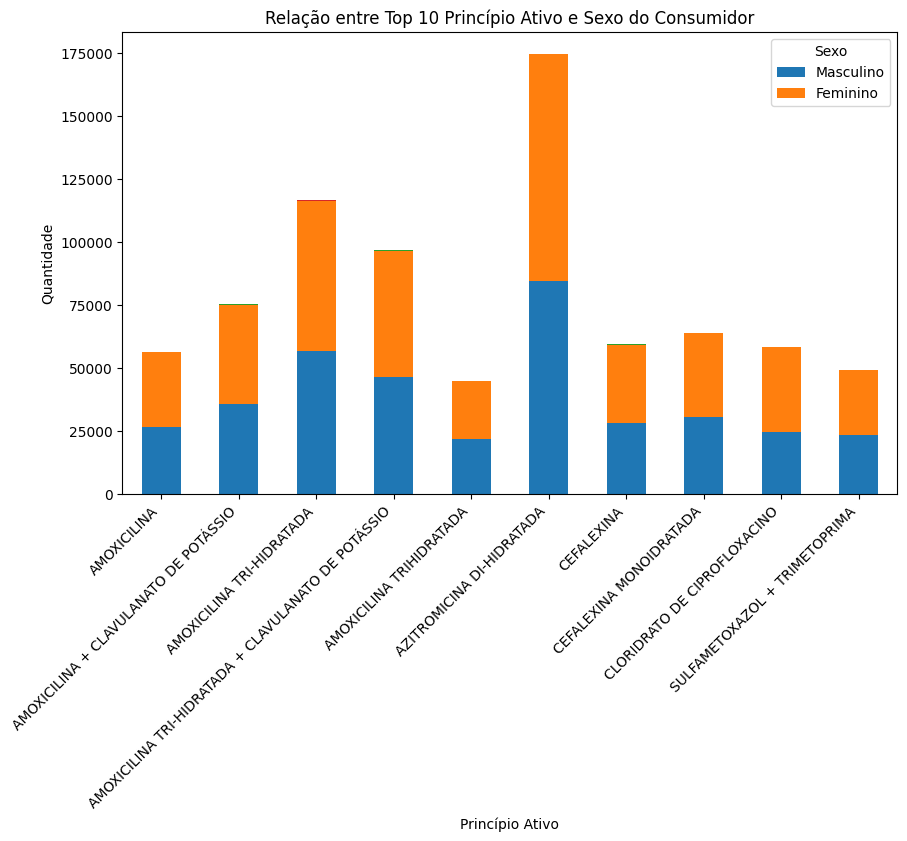

In [ ]:
# Plotando um gráfico de barras empilhadas com a relação entre as variáveis.
tabela_contingencia_sexo.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relação entre Top 10 Princípio Ativo e Sexo do Consumidor')
plt.xlabel('Princípio Ativo')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo', labels=['Masculino', 'Feminino'])

plt.show()

Analisando os dois gráficos plotados acima, **não fica clara uma relação entre o Top 10 Princípio Ativo com a idade e gênero dos consumidores**.
<br><br>
É possível ver que a idade média dos consumidores fica na faixa de **30 a 40 anos** para 9 dos 10 princípios ativos estudados, somente o princípio ativo **CLORIDRATO DE CIPROFLOXACINO** fica um pouco acima dessa faixa de idade.
<br><br>
No caso do gênero dos consumidores, há um equilibrio, somente quando o princípio ativo é o **CLORIDRATO DE CIPROFLOXACINO**, a diferença aumenta um pouco e fica na casa dos 15% a mais para o gênero feminino, ou seja, esse princípio ativo é mais consumido por mulheres, porém a diferença é pequena para considerarmos uma relação clara.

#### **5.4.4 Existe correlação entre as variáveis numéricas?**

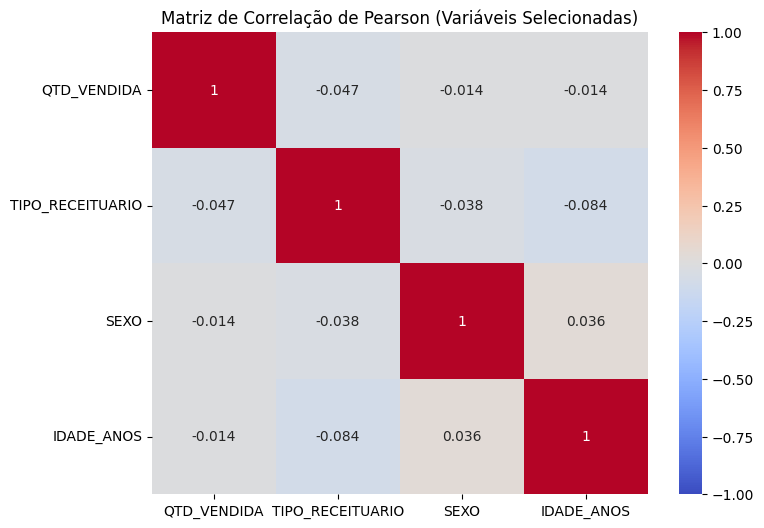

In [ ]:
# Lista das variáveis que serão incluidas na matriz de correlação.
variaveis_selecionadas = ['QTD_VENDIDA', 'TIPO_RECEITUARIO', 'SEXO', 'IDADE_ANOS']

# Dataframe contendo apenas as variáveis selecionadas.
df_selecionado = df_medicines_relacao[variaveis_selecionadas]

# Calculando a matriz de correlação de Pearson para as variáveis selecionadas.
corr_matrix = df_selecionado.corr()

# Plotando a matriz de correlação usando um heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Pearson (Variáveis Selecionadas)')

plt.show()

O Heatmap acima nos mostra que **não há correlação entre as variáveis numéricas**, pois os valores da Correlação de Pearson estão próximos de 0. Haveria correlação se esses mesmos valores **estivessem mais próximos das extremidades 1 e -1**, o que não acontece neste caso.

<br>

## **6. Insights e Recomendações**

Com base na análise de vendas de medicamentos, no mês de Novembro/2021, é possível identificar alguns hábitos e padrões.
<br><br>
* O número de vendas realizadas ficou bem próximo de atingir **3 milhões em um único mês**, o que dá quase **100 mil vendas de medicamentos realizadas por dia**. Sem levar em conta a quantidade de produtos vendidos em cada venda realizada. Isso mostra que se trata de uma indústria muito forte. **Será interessante para os próximos estudos, acrescentar as vendas dos meses anteriores, para descobrirmos se há uma tendência de alta nessas vendas ou tendência de baixa**.

* O estado de **São Paulo** e a cidade de **São Paulo**, foram os que mais registraram vendas, mostrando que a cidade/estado é o maior mercado. As regiões **Sudeste** e **Sul** são as que mais vendem medicamentos. As indústrias farmacêuticas e farmácias devem manter o foco especial nessas regiões. Isso pode incluir estratégias de marketing direcionadas, parcerias com médicos locais e o aumento do estoque de medicamentos populares na região, além de  continuar os investimentos nessa região. Isso pode envolver a expansão de lojas, promoção de programas de fidelidade e criação de promoções específicas para atender às demandas dessa região.

* As **mulheres** são maioria no consumo de medicamentos, porém a diferença para os **homens** é pequena, **cerca de 5% somente**. Pessoas de **35 a 40 anos** são os que mais consomem. Esses dados só levam em conta o consumo dos **medicamentos antimicrobianos**.

* A **AZITROMICINA DI-HIDRATADA** (como princípio ativo único) é o princípio ativo com mais registros de vendas, porém a quantidade vendida em cada venda não é tão alta, pois o produto mais vendido é o **CLONAZEPAM** (como princípio ativo único), esse medicamento é usado para prevenir e tratar convulsões, transtorno do pânico, transtornos de ansiedade e o distúrbio do movimento conhecido como acatisia. Foram **pouco mais de 600 mil produtos vendidos**, bem a frente do segundo princípio ativo mais vendido. Essa informação nos mostra uma tandência de doenças cujos os sintomas são os apresentados anteriormente, o que serve de parâmetro para as indrustrias farmacêuticas para a fabricação cada vez mais desses tipos de medicamentos e o controle do estoque.

* A apresentação mais vendida foi a **caixa com 1 blister, contendo 30 comprimidos, com 2 mg de princípio ativo cada**. A segunda apresentação mais vendida foi a **caixa com 1 blister, contendo 21 capsulas dura, com 500 mg de princípio ativo cada**. Um dado importante é que dos 10 tipos de apresentações mais vendidas, 9 delas são em comprimidos e 1 delas em cápsula. Outros tipos de apresentações, como por exemplo o frasco de vidro contendo líquido, não apareceram no top 10.

* Não foi notada uma realção clara entre o princípio ativo e a idade ou sexo dos consumidores.

<br>Para resumir, se fossemos traçar um perfil de consumidor, diriamos que o consumidor é da cidade de São Paulo, mulher, com idade entre 35 a 40 anos, consome o princípio ativo CLONAZEPAM para prevenir e tratar convulsões, transtorno do pânico, transtornos de ansiedade e o distúrbio de acatisia, na apresentação de caixa com 1 blister, contendo 30 comprimidos, com 2 mg de princípio ativo cada.